# **Loans Classification**

<br> **about project** :<br>

in this project we are building a model to power the decision making of a financial organisarion called loanless , this organisation is a financial instution , specialized in micro financial loans , so in they risk management strategie they are asking us to build a model to help reduce the default risk , this model would take data related to the client financial and social situation in order to assess his solvability and capacity of honoring his engagement , so as a datascient team we need to make a robust model based on historical data related to the loans default in order to help Loanless manage there financial risk .

<br> **Project Workflow** :<br>

1. loading the data and the libraries
2. cleaning and preparing the data for EDA
3. exploring the data and making hypothesis
4. testing the hypothesis and extracting insights
5. preparing the data for ML
6. choosing a training and model selection strategies
7. training the models and evaluating it
8. selecting a baseline model
9. tunning the model params
   10.serving the model as a FASTAPI for production
10. documentation of the API


### **1. loading the data and the libraries**


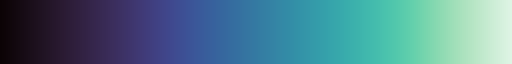

In [73]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as sp 
import duckdb

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import  RandomForestRegressor 
from sklearn.linear_model import  LogisticRegression 
from sklearn.compose import ColumnTransformer 
from sklearn.naive_bayes import  MultinomialNB
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder 

import warnings
warnings.filterwarnings('ignore')
sns.color_palette("mako", as_cmap=True)

In [3]:
df = pd.read_csv("hf://datasets/dipamc/loan_customer/Training Data 2.csv")

In [9]:
db = duckdb.connect(database=':memory:')

In [16]:
db.query("select * from df").to_df()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [18]:
df.shape

(252000, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### **2.cleaning and preparing the data for EDA**


In [22]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.drop('Id',axis=1,inplace=True)

#### **exploring the data**


In [ ]:
categ_col = [col for col in df.columns if df[col].dtype  in ['object','int64'] and len(df[col].unique()) <= 20 ]
Quant_col = [col for col in df.columns if df[col].dtype in ['float' ,'int64'] and  col not in categ_col]
col_list = categ_col + Quant_col
categ_20 = [col for col in df.columns if col not in col_list ]
print(f'Categorical columns :\n {categ_col}')
print(f'Quantinous columns :\n  {Quant_col}')
print(f'categorical col with more than 20 unique value : \n {categ_20}')

Categorical columns :
 ['Married/Single', 'House_Ownership', 'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
Quantinous columns :
  ['Income', 'Age', 'Experience']
categorical col with more than 20 unique value : 
 ['Profession', 'CITY', 'STATE']


In [65]:
for col in categ_col :
    print(col)
    print('number of unique values :',df[col].nunique())
    print('unique values :', df[col].unique())
    print('_'*60)


Married/Single
number of unique values : 2
unique values : ['single' 'married']
____________________________________________________________
House_Ownership
number of unique values : 3
unique values : ['rented' 'norent_noown' 'owned']
____________________________________________________________
Car_Ownership
number of unique values : 2
unique values : ['no' 'yes']
____________________________________________________________
CURRENT_JOB_YRS
number of unique values : 15
unique values : [ 3  9  4  2  0  8 11  5  7  6 12  1 10 13 14]
____________________________________________________________
CURRENT_HOUSE_YRS
number of unique values : 5
unique values : [13 10 12 14 11]
____________________________________________________________
Risk_Flag
number of unique values : 2
unique values : [0 1]
____________________________________________________________


#### **Frequancy of Categorical data**


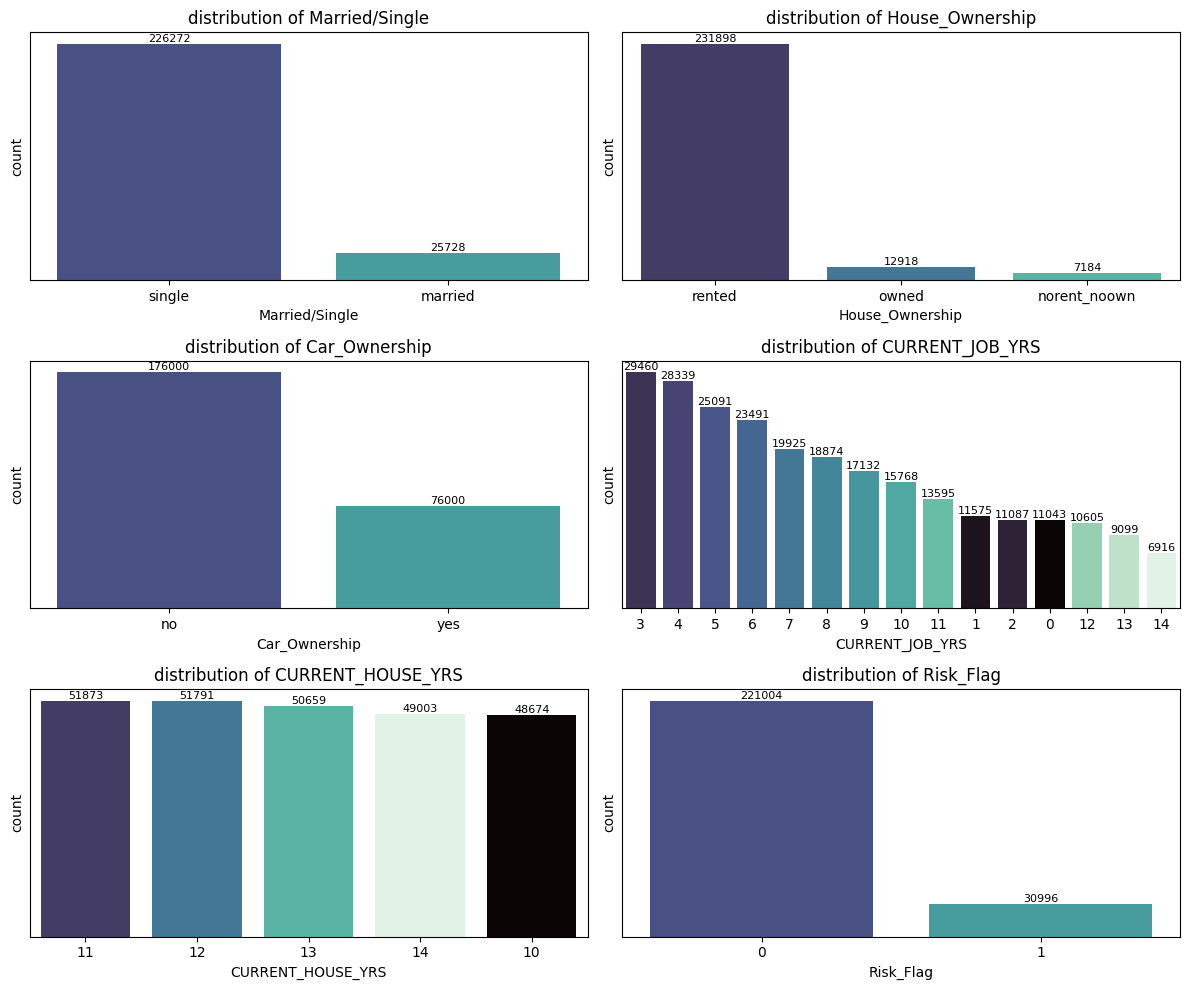

In [117]:
fig , ax = plt.subplots(3,2,figsize=(12,10))
ax = ax.flatten()

for i,col in enumerate(categ_col):
    data = df[col].value_counts().reset_index().sort_values(by='count',ascending=False)
    sns.barplot(data,x=col,y='count',hue=col,palette='mako',ax=ax[i],legend=False,order=data[col].tolist(),width=.8)
    ax[i].set_yticks([])
    [ax[i].bar_label(c,fontsize=8,label_type='edge',color='black')  for c in ax[i].containers]
    ax[i].set_title(f'distribution of {col}')
plt.tight_layout()

#### **Distrubition of Quantitive columns:**


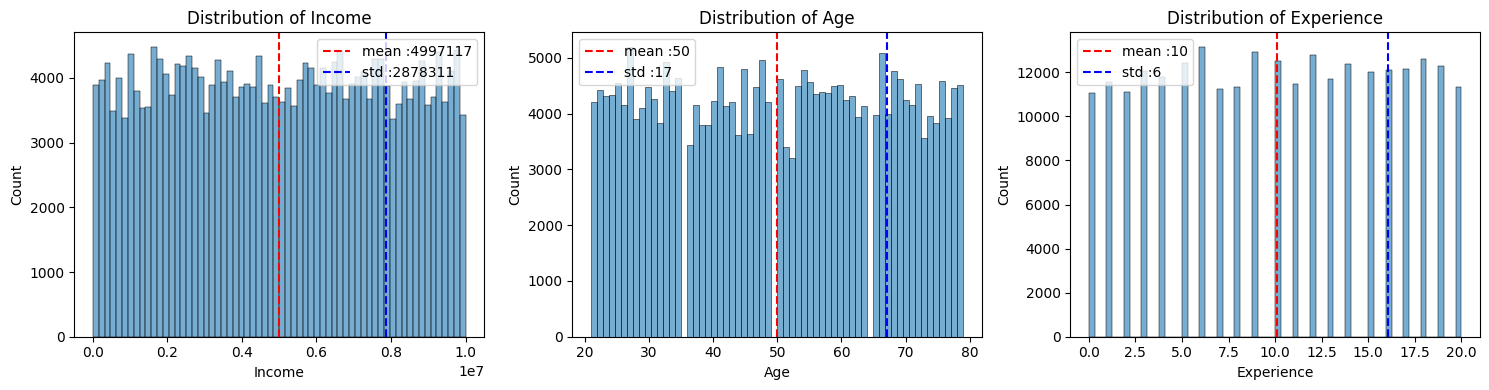

In [140]:
fig , ax = plt.subplots(1,len(Quant_col),figsize=(15,4))
ax = ax.flatten()

for i , col in enumerate(Quant_col):
    sns.histplot(x=df[col],alpha=.6,ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].axvline(df[col].mean(),linestyle='--',color='r',label=f'mean :{round(df[col].mean(),)}')
    ax[i].axvline(df[col].mean() + df[col].std(),linestyle='--',color='b',label=f'std :{round(df[col].std(),)}')
    ax[i].legend()
plt.tight_layout()
